In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Fire Detection Model**

## **Imports**

In [2]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.linear_model import Lasso,LassoCV
from sklearn import linear_model,metrics
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve,f1_score,classification_report,roc_curve,auc
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import lite
import warnings
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
warnings.filterwarnings('ignore')

## **Read Data**

In [3]:
data1 = pd.read_csv("/content/drive/MyDrive/Project/Algerian_forest_fires_dataset_UPDATE (1).csv")


In [4]:
data1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [5]:
data1.rename(columns = {'Temperature':'temp', ' Ws':'wind', 'Rain ':'rain',' RH':'RH','Classes  ':'Classes'}, inplace = True, errors="raise")

In [6]:
data1.head()

,day,month,year,temp,RH,wind,rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [7]:
data2 = pd.read_csv("/content/drive/MyDrive/Project/forestfires.csv")

In [8]:
data2.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
data2.month=data2.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
data2.day=data2.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})
data2.head(4)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0


## **Clean data**

In [10]:
data1.drop('year', inplace= True, axis=1)
data1.drop('day',inplace=True, axis=1)
data1.drop('BUI', inplace= True, axis=1)
data1.drop('FWI', inplace= True, axis=1)

In [11]:
data1.head(5)

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire


In [12]:
data2.drop('X', inplace= True, axis=1)
data2.drop('Y', inplace= True, axis=1)
data2.drop('day',inplace=True, axis=1)


In [13]:
data2.head(5)

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


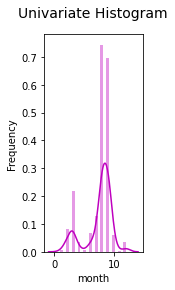

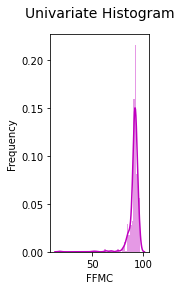

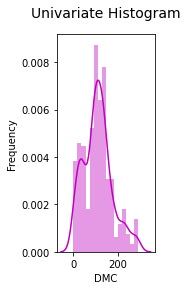

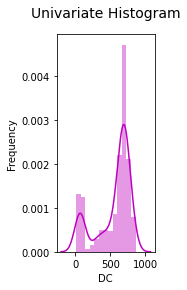

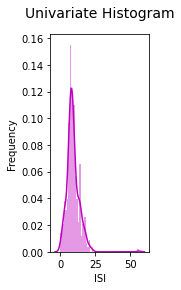

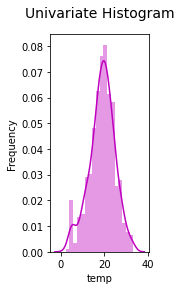

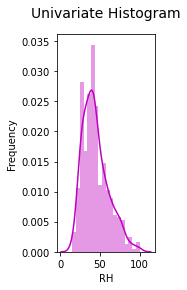

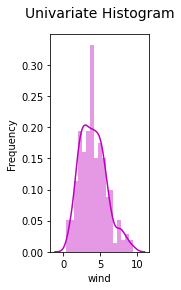

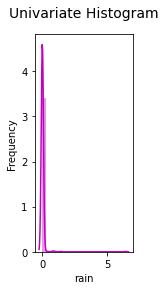

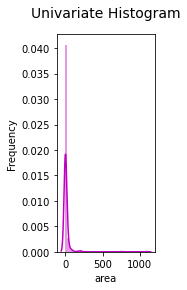

In [14]:
n=1
for i in ['month','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']:
	plt.figure(n)
	plt.subplot(131)# Univariate Histograms
	plt.title('Univariate Histogram', fontsize=14, position=(0.5,1.05))
	plt.ylabel('Frequency')
	# sns.distplot(data2[i],kde=False,color='r',rug=True)
	# plt.subplot(132) # Kernel Density Estimation
	# plt.title('Kernel Density Estimation', fontsize=14, position=(0.5,1.05))
	# plt.ylabel('Probability')
	# sns.distplot(data2[i],hist=False,color='g',kde_kws={'shade':True})
	# plt.subplot(133) # Single Parameter Distribution
	# plt.title('Single Parameter Distribution', fontsize=14, position=(0.5,1.05))
	# plt.ylabel('Probability')
	sns.distplot(data2[i],color='m')
	n += 1


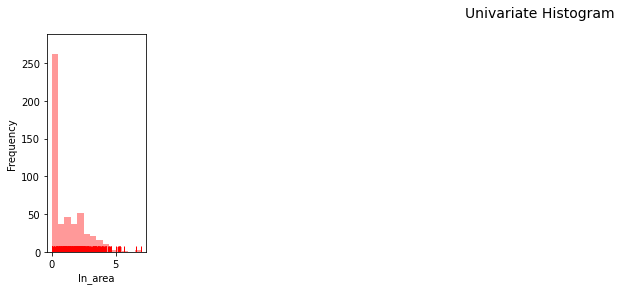

In [15]:
#According to the above three plots of 'area' in figure 13, the parameter is pretty distorted towards 0.0, 
#Thus using logrithm transform ln(area+1) to remodel 'area' and generate the new varibale 'ln(area+1)'
data2['ln_area']=np.log(data2['area']+1)
plt.figure(14)
plt.subplot(131)# Univariate Histograms
plt.title('Univariate Histogram', fontsize=14, position=(5,1.05))
plt.xlabel('ln(area+1)')
plt.ylabel('Frequency')
sns.distplot(data2['ln_area'],kde=False,color='r',rug=True)
# plt.subplot(132) #Kernel Density Estimation
# plt.title('Kernel Density Estimation', fontsize=14, position=(0.5,1.05))
# plt.ylabel('Probability')
# plt.xlabel('ln(area+1)')
# sns.distplot(data2['ln(area+1)'],hist=False,color='g',kde_kws={'shade':True})
# plt.subplot(133) # Single Parameter Distribution
# plt.title('Single Parameter Distribution', fontsize=14, position=(0.5,1.05))
# plt.ylabel('Probability')
# plt.xlabel('ln(area+1)')
# sns.distplot(data2['ln(area+1)'],color='m')

In [16]:
data2.describe()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ln_area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.111026
std,2.275990,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.398436
min,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,7.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,8.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.418710
75%,9.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193
max,12.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.995620


In [17]:
def getClass(ln_area):
  if ln_area == 0.0:
    return 'not fire'
  else :
    return 'fire'

In [18]:
data2['Classes'] = data2['ln_area'].apply(getClass)

In [19]:
data2.tail()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ln_area,Classes
512,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871,fire
513,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592,fire
514,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152,fire
515,8,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,not fire
516,11,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0.000000,not fire


In [20]:
data2.drop('area', inplace=True, axis=1)
data2.drop('ln_area', inplace=True, axis=1)
data2.head(5)

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Classes
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,not fire
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,not fire
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,not fire
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,not fire
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,not fire


## **Merge datasets**

In [21]:
data1.head()

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire


In [22]:
data2.columns

Index(['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'Classes'],
      dtype='object')

In [23]:
data2 = data2[['month','temp','RH','wind','rain','FFMC','DMC','DC','ISI','Classes']]
data2.head()

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
0,3,8.2,51,6.7,0.0,86.2,26.2,94.3,5.1,not fire
1,10,18.0,33,0.9,0.0,90.6,35.4,669.1,6.7,not fire
2,10,14.6,33,1.3,0.0,90.6,43.7,686.9,6.7,not fire
3,3,8.3,97,4.0,0.2,91.7,33.3,77.5,9.0,not fire
4,3,11.4,99,1.8,0.0,89.3,51.3,102.2,9.6,not fire


In [24]:
data1.isna().sum()

month      0
temp       0
RH         0
wind       0
rain       0
FFMC       0
DMC        0
DC         0
ISI        0
Classes    0
dtype: int64

In [25]:
data2.isna().sum()

month      0
temp       0
RH         0
wind       0
rain       0
FFMC       0
DMC        0
DC         0
ISI        0
Classes    0
dtype: int64

In [26]:
data = [data1,data2]
df = pd.concat(data, ignore_index=True)


### **Final Dataset**

In [27]:
df.head()

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
0,6,29.0,57,18.0,0.0,65.7,3.4,7.6,1.3,not fire
1,6,29.0,61,13.0,1.3,64.4,4.1,7.6,1.0,not fire
2,6,26.0,82,22.0,13.1,47.1,2.5,7.1,0.3,not fire
3,6,25.0,89,13.0,2.5,28.6,1.3,6.9,0.0,not fire
4,6,27.0,77,16.0,0.0,64.8,3.0,14.2,1.2,not fire


Attribute Information:


* month - month of the year: 'jan' to 'dec' ( 1 to 12 )
* FFMC - FFMC index from the FWI system: 18.7 to 96.20
* DMC - DMC index from the FWI system: 1.1 to 291.3
* DC - DC index from the FWI system: 7.9 to 860.6
* ISI - ISI index from the FWI system: 0.0 to 56.10
* temp - temperature in Celsius degrees: 2.2 to 33.30
* RH - relative humidity in %: 15.0 to 100
* wind - wind speed in km/h: 0.40 to 9.40
* rain - outside rain in mm/m2 : 0.0 to 6.4
* classes - fire or not fire



In [28]:
df.shape

(761, 10)

In [29]:
df.describe()

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,7.483574,23.148095,49.947438,7.700526,0.258607,86.554402,80.027989,388.056899,7.659790
std,1.978185,8.099219,17.876252,5.786381,1.206968,11.041353,69.659117,311.030549,4.860411
min,1.000000,2.200000,15.000000,0.400000,0.000000,18.700000,0.700000,6.900000,0.000000
25%,7.000000,17.600000,35.000000,3.100000,0.000000,85.400000,16.500000,50.200000,4.100000
50%,8.000000,22.400000,47.000000,4.900000,0.000000,90.700000,73.400000,466.600000,7.500000
75%,9.000000,30.000000,64.000000,14.000000,0.000000,92.300000,126.500000,690.000000,9.800000
max,12.000000,42.000000,100.000000,29.000000,16.800000,96.200000,291.300000,860.600000,56.100000


## **EDA**

### **Encoding target variable**

In [30]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [31]:
def getTarget(Classes):
  if Classes == 'not fire   ':
    return 0
  elif Classes == 'not fire':
    return 0
  elif Classes == 'not fire ':
    return 0
  elif Classes ==  'not fire     ':
    return 0
  elif Classes == 'not fire    ':
    return 0
  elif Classes == 'fire   ':
    return 1
  elif Classes == 'fire':
    return 1
  elif Classes == 'fire ':
    return 1


In [32]:
df['Classes']=df['Classes'].apply(getTarget)
df.head()

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
0,6,29.0,57,18.0,0.0,65.7,3.4,7.6,1.3,0
1,6,29.0,61,13.0,1.3,64.4,4.1,7.6,1.0,0
2,6,26.0,82,22.0,13.1,47.1,2.5,7.1,0.3,0
3,6,25.0,89,13.0,2.5,28.6,1.3,6.9,0.0,0
4,6,27.0,77,16.0,0.0,64.8,3.0,14.2,1.2,0


In [33]:
df.tail()

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
756,8,27.8,32,2.7,0.0,81.6,56.7,665.6,1.9,1
757,8,21.9,71,5.8,0.0,81.6,56.7,665.6,1.9,1
758,8,21.2,70,6.7,0.0,81.6,56.7,665.6,1.9,1
759,8,25.6,42,4.0,0.0,94.4,146.0,614.7,11.3,0
760,11,11.8,31,4.5,0.0,79.5,3.0,106.7,1.1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    761 non-null    int64  
 1   temp     761 non-null    float64
 2   RH       761 non-null    int64  
 3   wind     761 non-null    float64
 4   rain     761 non-null    float64
 5   FFMC     761 non-null    float64
 6   DMC      761 non-null    float64
 7   DC       761 non-null    float64
 8   ISI      761 non-null    float64
 9   Classes  761 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 59.6 KB


### **Validation Set**

In [35]:
# 10% of dataset
v = 0.1*761
print(v)

76.10000000000001


In [36]:
val = df.sample(n=76)
val

,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
483,4,13.4,75,1.8,0.0,81.9,3.0,7.9,3.5,0
419,8,20.3,39,4.9,0.0,90.2,96.9,624.2,8.9,1
144,6,33.0,59,16.0,0.8,74.2,7.0,8.3,1.6,0
422,9,18.3,45,2.2,0.0,90.1,82.9,735.7,6.2,1
238,9,28.0,70,15.0,0.0,79.9,13.8,36.1,2.4,0
...,...,...,...,...,...,...,...,...,...,...
747,8,29.2,30,4.9,0.0,94.5,139.4,689.1,20.0,1
222,9,30.0,80,15.0,0.0,83.1,7.9,34.5,3.5,1
724,7,30.2,25,4.5,0.0,93.2,114.4,560.0,9.5,1
115,9,29.0,65,19.0,0.6,68.3,5.5,15.2,1.5,0


In [37]:
df = df.drop(val.index)

In [38]:
val.columns

Index(['month', 'temp', 'RH', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'Classes'],
      dtype='object')

In [39]:
val.shape

(76, 10)

In [40]:
df.shape

(685, 10)

In [41]:
val.to_csv('fire_validation.csv')

In [42]:
df.to_csv('df.csv')

### **Feature Correlation**

<bound method Axes.set_title of <matplotlib.axes._subplots.AxesSubplot object at 0x7fdf14a1cc90>>

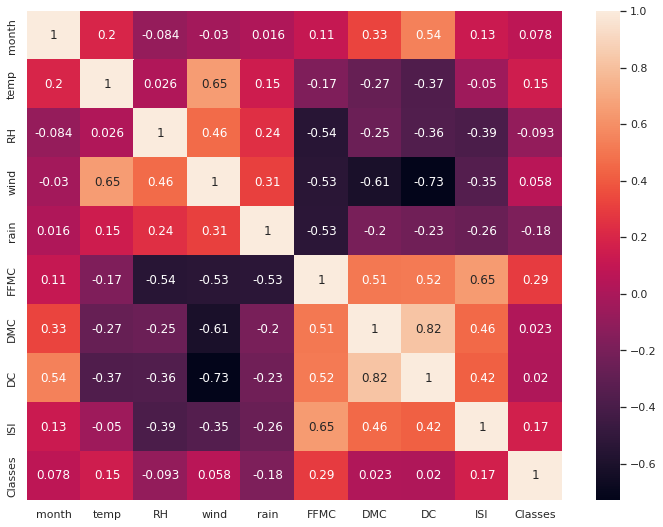

In [43]:
correlation = df.corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True).set_title

## **Scaling & Building Models**

### **Feature selection**

In [44]:
y = df['Classes']
x = df.drop('Classes',axis=1)

In [45]:
cols = x.columns
cols

Index(['month', 'temp', 'RH', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI'], dtype='object')

In [46]:
regressor=LassoCV()
regressor.fit(x,y)

LassoCV()

In [47]:
coef_col = (regressor.coef_)
selected_features =(x.columns[(coef_col != 0)])
selected_features

Index(['temp', 'RH', 'wind', 'FFMC', 'DMC', 'DC'], dtype='object')

After perfoming Lasso regression two features were selected for modeling



In [48]:
rejected_features =  x.columns[(coef_col == 0)]
rejected_features

Index(['month', 'rain', 'ISI'], dtype='object')

In [49]:
X = x.drop(rejected_features, axis=1)

In [50]:
X.columns

Index(['temp', 'RH', 'wind', 'FFMC', 'DMC', 'DC'], dtype='object')

In [51]:
X.shape

(685, 6)

### **Data Splitting**

In [52]:
X.shape

(685, 6)

In [80]:
def split(X,y):
    target_data = 'Classes'
    # robust_scaler = RobustScaler()
    # X = robust_scaler.fit_transform(X) #rescales features to the same scale
    y=df[target_data]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    return  np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [81]:
def balance_classes(X, y):
    sm = SMOTE(random_state=2)
    X_res, y_res = sm.fit_resample(X, y.ravel())
    return X_res, y_res


In [82]:
def set_sets(X,y):
    X_train, X_test, y_train, y_test =  split(X,y)
    X_res, y_res = balance_classes(X_train, y_train)
    print("Number rows x_train dataset: ", X_train.shape)
    print("Number rows y_train dataset: ", y_train.shape)
    print("Number rows x_test dataset: ", X_test.shape)
    print("Number rows y_test dataset: ", y_test.shape)
    print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
    print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1))) 
    print('After OverSampling, the shape of X_res: {}'.format(X_res.shape))
    print('After OverSampling, the shape of y_res: {}'.format(y_res.shape))
    print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
    print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
    
    return X_res, X_test, y_res, y_test

In [83]:
#confusion matrix
def cmatrix (cm,labels=['paid','default']):
  df = pd.DataFrame(data=cm,index=labels,columns=labels)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  return df
 

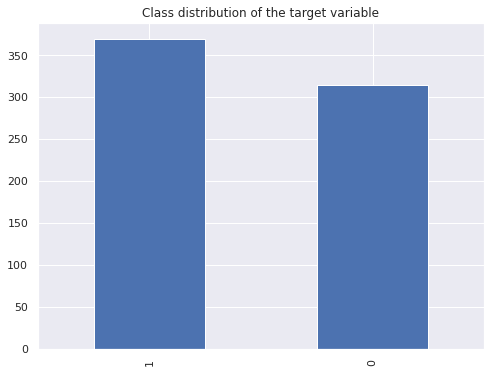

In [84]:
value_counts = df["Classes"].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target variable")

In [85]:
X_res, X_test, y_res, y_test = set_sets(X,y)

Number rows x_train dataset:  (479, 6)
Number rows y_train dataset:  (479,)
Number rows x_test dataset:  (206, 6)
Number rows y_test dataset:  (206,)
Before OverSampling, counts of label '0': 211
Before OverSampling, counts of label '1': 268
After OverSampling, the shape of X_res: (536, 6)
After OverSampling, the shape of y_res: (536,)
After OverSampling, counts of label '0': 268
After OverSampling, counts of label '1': 268


In [86]:
X_res.shape

(536, 6)

### **Models**

[1 1 1 1 1]
Confusion Matrix is : 
 [[77 27]
 [29 73]]


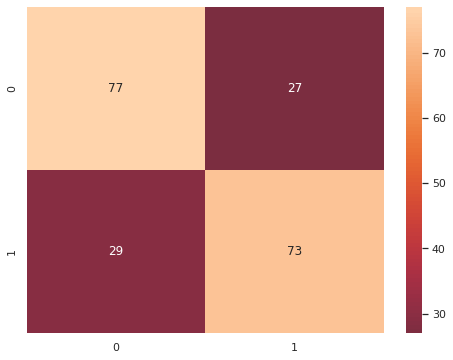

Accuracy :  0.7281553398058253


Precision :  0.7156862745098039


Recall :  0.73


F1 Score :  0.7227722772277227


              precision    recall  f1-score   support

           0       0.73      0.74      0.73       104
           1       0.73      0.72      0.72       102

    accuracy                           0.73       206
   macro avg       0.73      0.73      0.73       206
weighted avg       0.73      0.73      0.73       206

the AUC is : 0.73


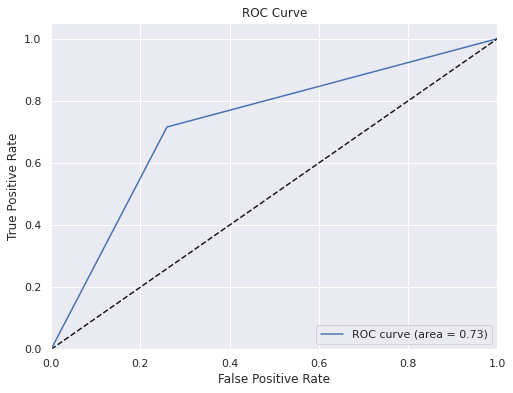

In [87]:
model = RandomForestClassifier()
model.fit(X_res, y_res)

# Make predictions.
predictions = model.predict(X_test)
#show first 5 model predictions on the test data
print(predictions[0:5])

# Compute the error.
CM = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', CM)

# Confusion matrix
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(CM, center = True , annot=True)
plt.show()

# Compute accuracy

print("Accuracy : ",accuracy_score(predictions,y_test))
print('\n') 
print("Precision : ",precision_score(predictions,y_test))
print('\n')
print("Recall : " , recall_score(predictions,y_test))
print('\n')
print("F1 Score : " , f1_score(predictions,y_test))
print('\n')

#classification report
print(classification_report(y_test,predictions))


#ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,predictions)
AUC  = auc(fpr, tpr)
print ('the AUC is : %0.2f' %  AUC)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [88]:
validate = pd.read_csv('fire_validation.csv')

In [101]:
validate.head(7)

,Unnamed: 0,month,temp,RH,wind,rain,FFMC,DMC,DC,ISI,Classes
0,483,4,13.4,75,1.8,0.0,81.9,3.0,7.9,3.5,0
1,419,8,20.3,39,4.9,0.0,90.2,96.9,624.2,8.9,1
2,144,6,33.0,59,16.0,0.8,74.2,7.0,8.3,1.6,0
3,422,9,18.3,45,2.2,0.0,90.1,82.9,735.7,6.2,1
4,238,9,28.0,70,15.0,0.0,79.9,13.8,36.1,2.4,0
5,138,6,31.0,69,17.0,4.7,62.2,3.9,8.0,1.1,0
6,192,8,39.0,39,15.0,0.2,89.3,15.8,35.4,8.2,1


In [96]:
X_val = validate.drop(['Unnamed: 0','month','rain','ISI','Classes'], axis = 1)
# robust_scaler = RobustScaler()
# X_val = robust_scaler.fit_transform(X_val) 

In [97]:
X_val

,temp,RH,wind,FFMC,DMC,DC
0,13.4,75,1.8,81.9,3.0,7.9
1,20.3,39,4.9,90.2,96.9,624.2
2,33.0,59,16.0,74.2,7.0,8.3
3,18.3,45,2.2,90.1,82.9,735.7
4,28.0,70,15.0,79.9,13.8,36.1
...,...,...,...,...,...,...
71,29.2,30,4.9,94.5,139.4,689.1
72,30.0,80,15.0,83.1,7.9,34.5
73,30.2,25,4.5,93.2,114.4,560.0
74,29.0,65,19.0,68.3,5.5,15.2


In [98]:
model.predict(X_val)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [95]:
joblib.dump(model, "./random_forest.joblib")

['./random_forest.joblib']